Дипломный проект

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import traceback

1. Загрузить файл hr.csv

In [3]:
data = pd.read_csv('HR.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
column_statistic = {}
column_data = ['satisfaction_level',
             'last_evaluation',
             'number_project',
             'average_montly_hours',
             'time_spend_company',
             'Work_accident',
             'left',
             'promotion_last_5years',
             'sales',
             'salary'
            ]
index_data=[]
mean_data=[]
median_data=[]
mode_data=[]
max_data=[]
min_data=[]
pstdev_data=[]
for name in column_data:
    if data[name].dtypes!=object:
        index_data.append(name)
        mean_data.append(statistics.mean(data[name]))
        median_data.append(statistics.median(data[name]))
        try:
            mode_data.append(statistics.mode(data[name]))
        except:
            check={}
            for i in data[name]:
                if i not in check:
                    check[i] = 1
                else:
                    check[i] += 1
            maxp = 0
            mode_duration = None
            for k, v in check.items():
                if maxp < v:
                    maxp = v
                    mode_duration = k
            mode_data.append(mode_duration)
        max_data.append(max(data[name]))
        min_data.append(min(data[name]))
        pstdev_data.append(statistics.pstdev(data[name]))
column_statistic.setdefault('mean', mean_data)
column_statistic.setdefault('median', median_data)
column_statistic.setdefault('mode', mode_data)
column_statistic.setdefault('max', max_data)
column_statistic.setdefault('min', min_data)
column_statistic.setdefault('pstdev', pstdev_data)

[0.2486223626820733,
 0.1711634045107436,
 1.2325512654823438,
 49.94143446256218,
 1.4600875552715114,
 0.3517068274513532,
 0.42590990072709495,
 0.14427665479561314]

In [4]:
statistic_parametres = pd.DataFrame(column_statistic, index=index_data)
statistic_parametres

,mean,median,mode,max,min,pstdev
satisfaction_level,0.612834,0.64,0.10,1.0,0.09,0.248622
last_evaluation,0.716102,0.72,0.55,1.0,0.36,0.171163
number_project,3.803054,4.00,4.00,7.0,2.00,1.232551
average_montly_hours,201.050337,200.00,135.00,310.0,96.00,49.941434
time_spend_company,3.498233,3.00,3.00,10.0,2.00,1.460088
Work_accident,0.144610,0.00,0.00,1.0,0.00,0.351707
left,0.238083,0.00,0.00,1.0,0.00,0.425910
promotion_last_5years,0.021268,0.00,0.00,1.0,0.00,0.144277


3. Рассчитать и визуализировать корреляционную матрицу для переменных

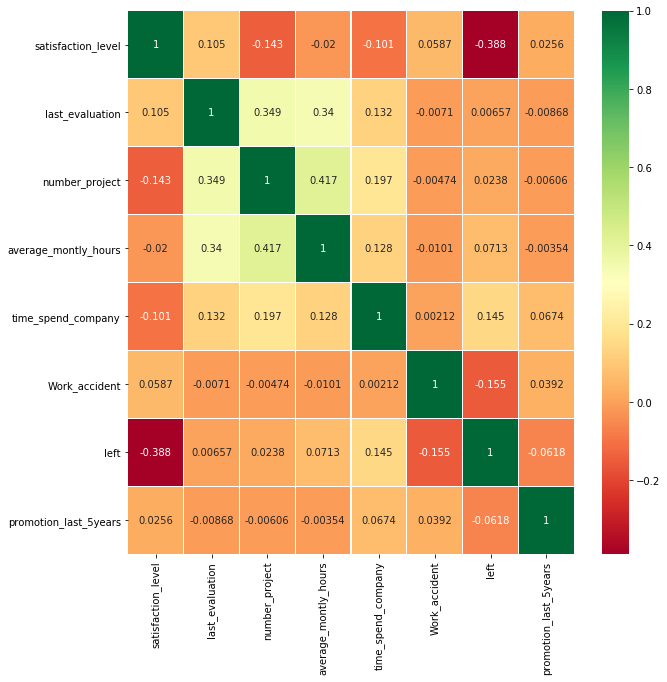

In [5]:
sns.heatmap(data.corr(), annot=True, fmt='.3g', cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Вывод: в данной компании существует отрицательная корреляция между "уровем удовлетворенностью" и "сотрудниками, пока что работающими в данной компании", также наблюдается высокий уровень взаимосвязи между "средним количеством часов в месяц" и "номером проекта" (наверное, чем выше ранг проекта, тем больше он труднее и сотрудникам необходимо больше часов работать)

4. Визуализировать несколько взаимосвязей между переменными

In [4]:
#оставим только тех работников, которые не покинули компанию
data_work = data[data.left==0]
data_work.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


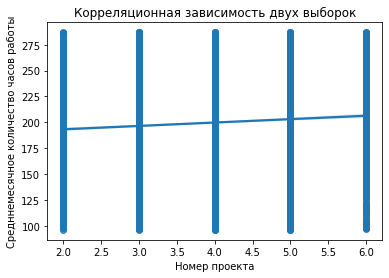

In [7]:
number_project = data_work['number_project']
average_montly_hours = data_work['average_montly_hours']
sns.regplot(x= number_project, y=average_montly_hours, data=data_work, fit_reg=True)
plt.xlabel('Номер проекта')
plt.ylabel('Средннемесячное количество часов работы')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Вывод: чем выше номер проекта, тем больше усилий и времени нужно прилагать сотрудникам

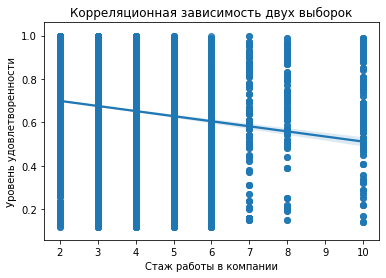

In [8]:
time_spend_company = data_work['time_spend_company']
satisfaction_level = data_work['satisfaction_level']
sns.regplot(x= time_spend_company, y=satisfaction_level, data=data_work, fit_reg=True)
plt.xlabel('Стаж работы в компании')
plt.ylabel('Уровень удовлетворенности')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Вывод: чем больше сотрудники работают в этой компании, тем степень их удовлетворенности сокращается

5. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше) 

In [22]:
#По идеи должна быть связь между стажем работы и уровнем удовлетворенности
last_evaluation = data_work['last_evaluation']

stats.ttest_ind(last_evaluation, satisfaction_level)

Ttest_indResult(statistic=19.204517528335444, pvalue=1.4905614713665462e-81)

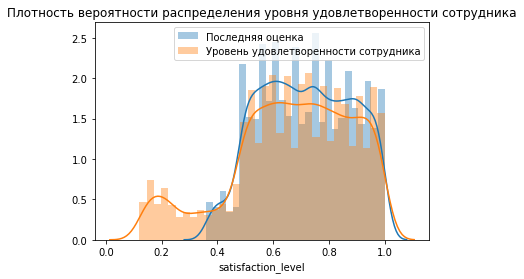

In [23]:
sns.distplot(last_evaluation)
sns.distplot(satisfaction_level)
plt.title('Плотность вероятности распределения уровня удовлетворенности сотрудника')
plt.legend(['Последняя оценка', 'Уровень удовлетворенности сотрудника'])
plt.show()

Вывод: последняя оценка сильно коррелирует (зависит) от уровня удовлетворенности сотрудника

In [5]:
#Если имелось ввиду выборки в плане сотрудников, то
people = data_work[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
people.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
2000,0.58,0.74,4,215,3
2001,0.82,0.67,2,202,3
2002,0.45,0.69,5,193,3
2003,0.78,0.82,5,247,3
2004,0.49,0.60,3,214,2
2005,0.36,0.95,3,206,4
2006,0.54,0.37,2,176,2
2007,0.99,0.91,5,136,4
2008,0.50,0.75,6,127,3
2009,0.74,0.64,4,268,3


In [7]:
a1 = people.sample()
a1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
13538,0.59,0.64,5,269,3


In [8]:
a2 = people.sample()
a2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
4772,0.58,0.98,3,146,3


In [9]:
stats.ttest_ind(a1, a2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=array([nan, nan, nan, nan, nan]), pvalue=array([nan, nan, nan, nan, nan]))

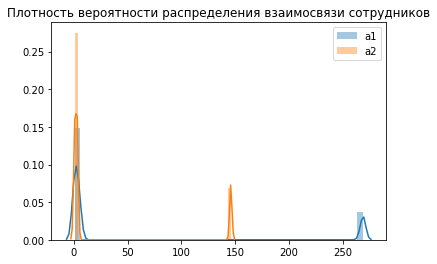

In [10]:
sns.distplot(a1)
sns.distplot(a2)

plt.title('Плотность вероятности распределения взаимосвязи сотрудников')
plt.legend(['a1', 'a2'])
plt.show()

6. Рассчитать сколько сотрудников работает в каждом департаменте

In [5]:
def count_uniq_person(data):
    return data.satisfaction_level.count()

In [33]:
print('В департаментах работают : \n', data_work.groupby('sales').apply(count_uniq_person))

В департаментах работают : 
 sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
dtype: int64


Вывод: больше всего сотрудн6иков работает в отделе продаж и техническом.

7. Показать распределение сотрудников по зарплатам

In [36]:
df=data_work.groupby('salary').apply(count_uniq_person)
df=sorted(df, reverse=True)
df

[5144, 5129, 1155]

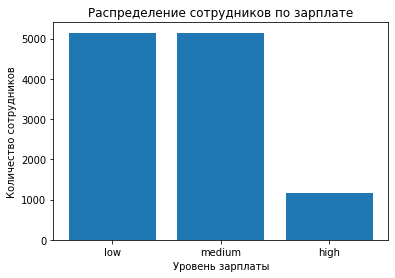

In [35]:
salary_diag=['low', 'medium' ,'high']
plt.bar(salary_diag, df)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплате')
plt.show()

Вывод: логично, что больше всего работников с низкими зарплатами, а топ-менеджеров,у которых высокие зарплаты, меньше всего.

8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [43]:
sales_data=data_work.groupby(['sales','salary']).apply(count_uniq_person).reset_index()
sales_data.columns=['sales', 'salary', 'count']
sales_data

,sales,salary,count
0,IT,high,79
1,IT,low,437
2,IT,medium,438
3,RandD,high,47
4,RandD,low,309
5,RandD,medium,310
6,accounting,high,69
7,accounting,low,259
8,accounting,medium,235
9,hr,high,39


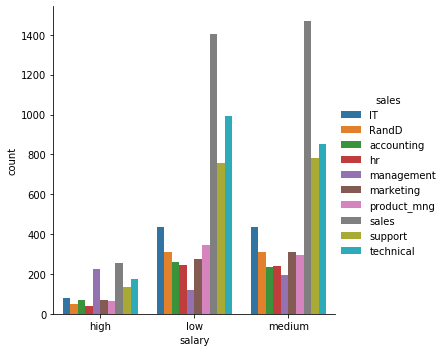

In [44]:
r = sales_data['salary']
f = sales_data['count']
sns.catplot(x='salary', y='count', hue='sales', kind='bar', data=sales_data)

Вывод: в некоторых отджелах дела обстоят лучше: например, в отделе продаж сотрудников со средним уровнем дохода больше, чем с низким.

9. Сколько сотрудников покинули компанию

In [25]:
all_employee = data.groupby('left').apply(count_uniq_person)
print('Компанию покинул', all_employee[1],'сотрудник')

Компанию покинул 3571 сотрудник


10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Гипотеза 1. Увольняются сотрудники, которым приходится слишком много времени проводить на работе, либо увольняют тех, которые очень мало времени посвящают работе

In [6]:
work_time_leave = data[data['left']==0]['average_montly_hours']
work_time_left = data[data['left']==1]['average_montly_hours']
stats.ttest_ind(work_time_leave, work_time_left)

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

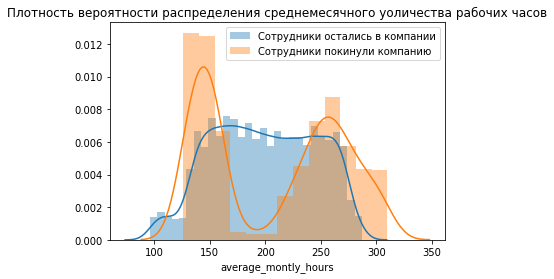

In [9]:
sns.distplot(work_time_leave)
sns.distplot(work_time_left)
plt.title('Плотность вероятности распределения среднемесячного количества рабочих часов')
plt.legend(['Сотрудники остались в компании', 'Сотрудники покинули компанию'])
plt.show()

Вывод:гипотеза верна. Ушли те работники, у которых либо среднемесячное количество часов либо намного меньше среднего (скорее всего их уволняли), либо намного выше (устали перерабатывать и, наверное, сами ушли)

Гипотеза 2. Увольняются сотрудники, у которых степень удовлетворенности от работы низкая

In [10]:
like_level_leave = data[data['left']==0]['satisfaction_level']
like_level_left = data[data['left']==1]['satisfaction_level']
stats.ttest_ind(like_level_leave, like_level_left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

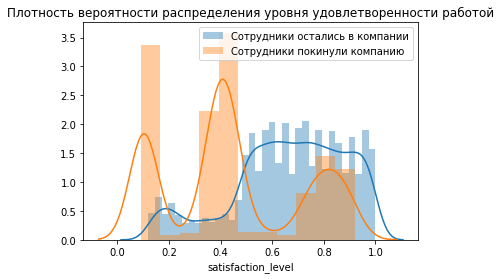

In [11]:
sns.distplot(like_level_leave)
sns.distplot(like_level_left)
plt.title('Плотность вероятности распределения уровня удовлетворенности работой')
plt.legend(['Сотрудники остались в компании', 'Сотрудники покинули компанию'])
plt.show()

Вывод: гипотеза частично верна. Большинство тех, кто не удовлетворен работой ушли, но есть и такие, которых все устраивало, однако они продолжили карьеры вне анализируемой компании. 